In [75]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Тарасюк Юлия

# SEIR


\begin{equation*} 
 \begin{cases}
   \dot{S} = - \alpha S I \\ 
   \dot{E} = \alpha S I - \gamma E \\ 
   \dot{I} = \gamma E - \beta I \\ 
    \dot{R} = \beta I
 \end{cases}
\end{equation*}


# 1.1
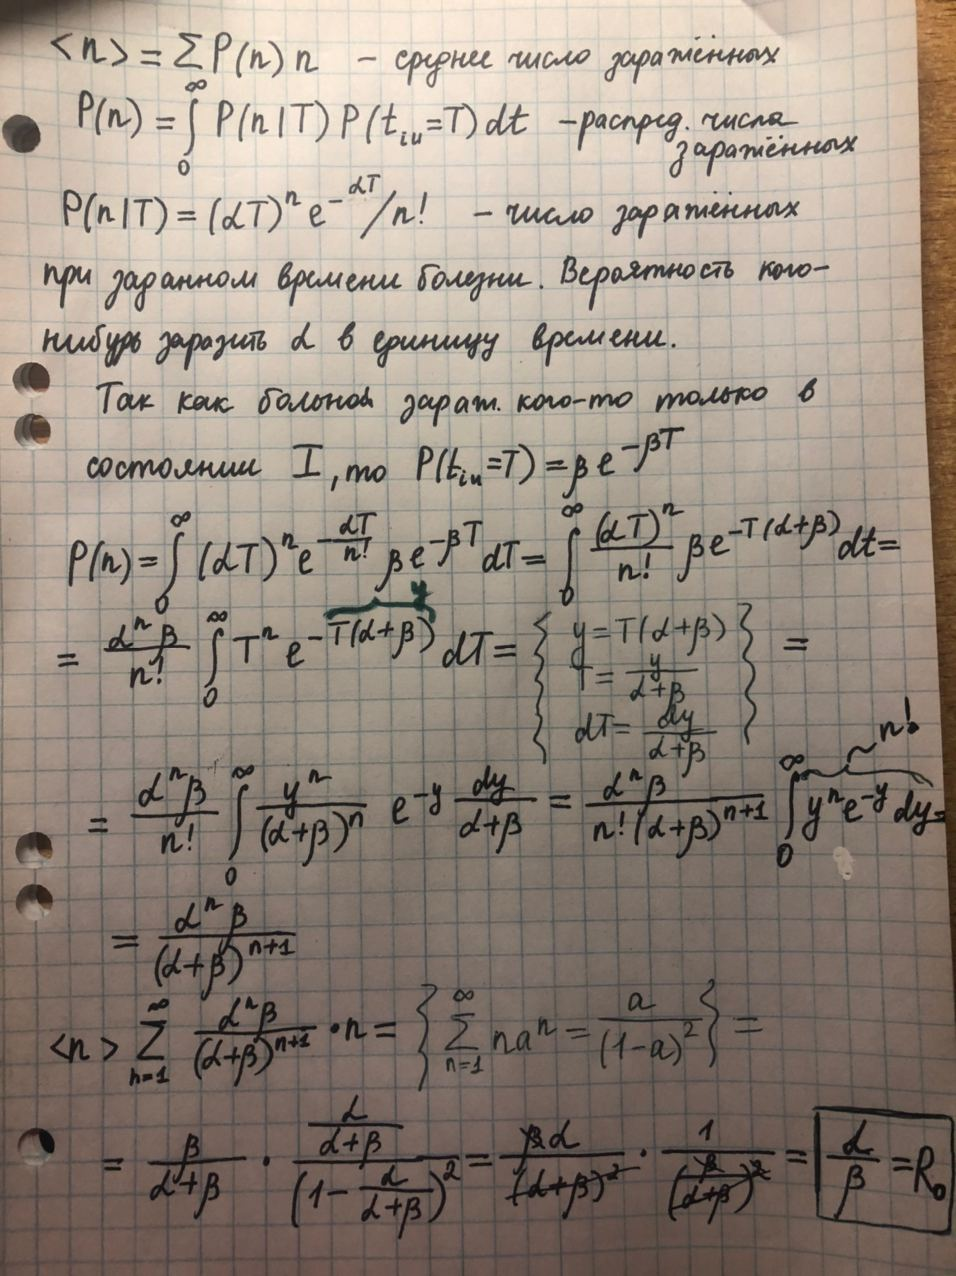

## $R_0 = \dfrac{\lambda}{\beta}$

# 1.2
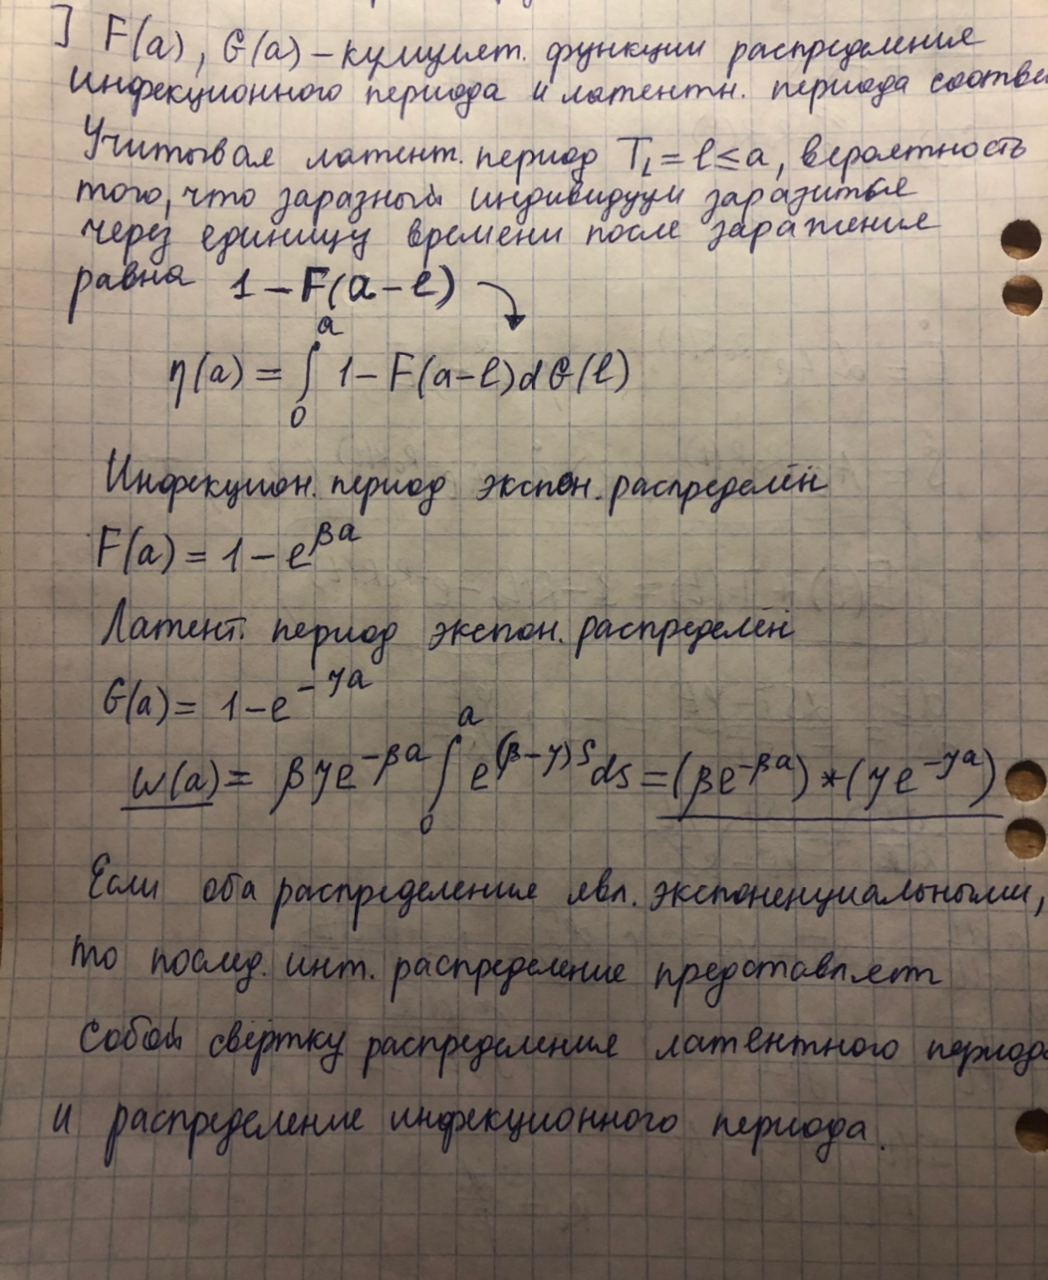

# 1.3
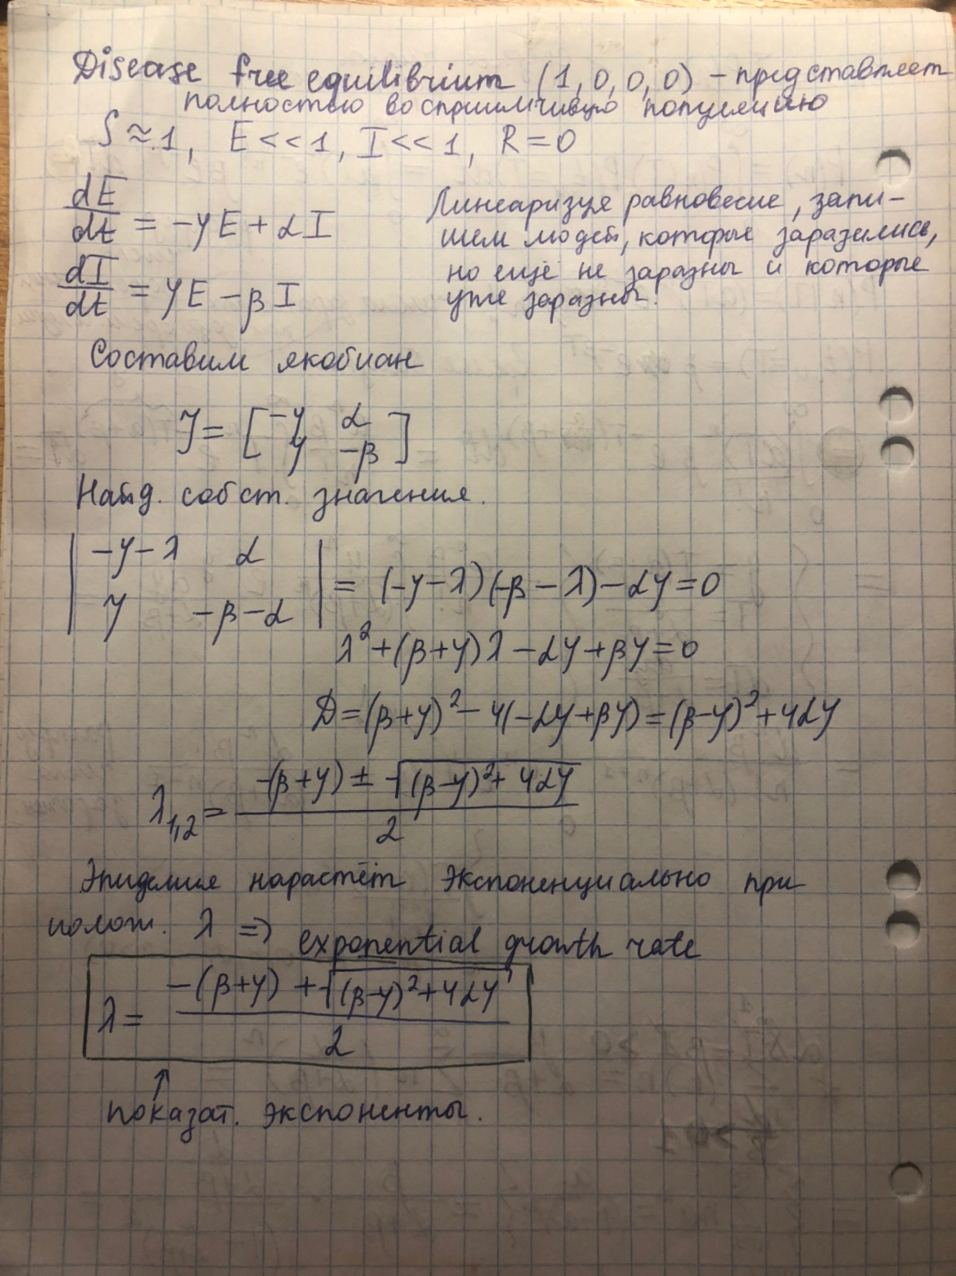

## exponential growth rate 
## $\lambda = \dfrac{-(\beta+\gamma)+\sqrt{(\beta-\gamma)^2+4\alpha \gamma}}{2}$

Отсюда можно получить $R_0$ в чуть другой форме, через $\lambda$

Выразим $\alpha=\beta+\lambda+\frac{\lambda}{\gamma}(\beta+\lambda) $

$R_{0}=\frac{\alpha}{\beta}=1+\frac{\lambda}{\beta}+\frac{\lambda}{\gamma\beta}(\beta+\lambda)$

# 1.4

In [73]:
def deriv_seir(y, t, N, alpha, gamma, beta):
    S, E, I, R = y

    #Write your code here
    dSdt = -alpha*I*S/N
    dEdt = alpha*I*S/N -gamma*E
    dIdt = gamma*E -beta*I
    dRdt = beta*I

    return dSdt, dEdt, dIdt, dRdt

In [87]:
def model_seir(N, alpha, gamma, beta):
    t = np.linspace(0, 22)
    S = 0.9999
    E = 0.0001
    I = 0
    R = 0
    y = S, E, I, R

    ret = odeint(deriv_seir, y, t, args=(N, alpha, gamma, beta))
    S, E, I, R = ret.T

    return t, S, E, I, R

In [88]:
def plot_seir(t,S,E,I,R):
    plt.figure(figsize=(15, 9))
    plt.plot(t,S,'b',linewidth=2,label='Susceptible')
    plt.plot(t,E,'y',linewidth=2,label='Exposed')
    plt.plot(t,I,'r',linewidth=2,label='Infectious')
    plt.plot(t,R,'g',linewidth=2,label='Recovered')
    plt.legend()
    plt.show();

In [99]:
import math
def seir_lambda(alpha, gamma, beta):
    return (-(beta+gamma)+math.sqrt((beta-gamma)**2+4*alpha*gamma))/2

### S = 0.9999, E = 0.0001, I = 0, R = 0
$$ \beta = \gamma = 3 $$
$$ \alpha = 1 $$

Экспоненциальный рост -1.268


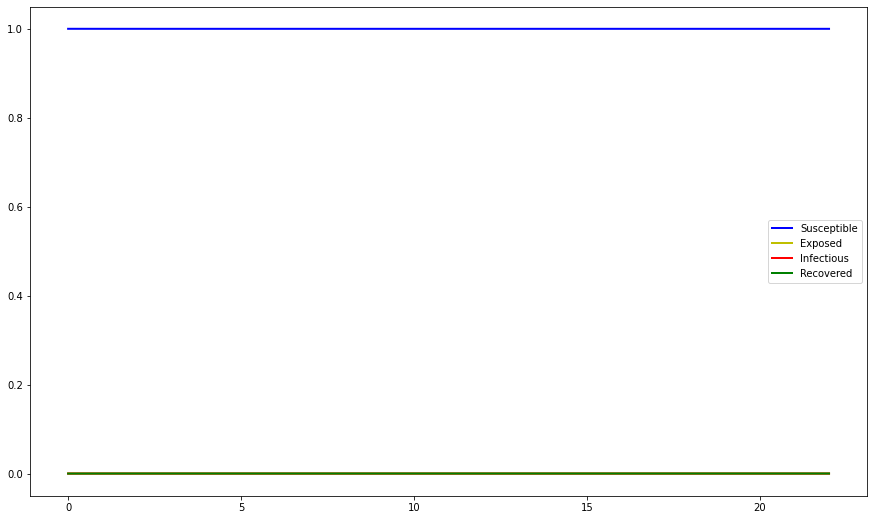

In [109]:
N = 1
alpha = 1
beta = 3
gamma = 3
t, S, E, I, R = model_seir(N, alpha, gamma, beta)

exp_growth = round(seir_lambda(alpha, gamma, beta), 3)
print(f'Экспоненциальный рост {exp_growth}')

#calling plot_seir here
plot_seir(t,S,E,I,R)


$R_0 < 1$, эпидемия не начинается


Экспоненциальный рост получается отрицательным. Всё верно, роста быть не должно 

$$ \beta = \gamma = 3 $$
$$ \alpha = 3 $$

Экспоненциальный рост 0.0


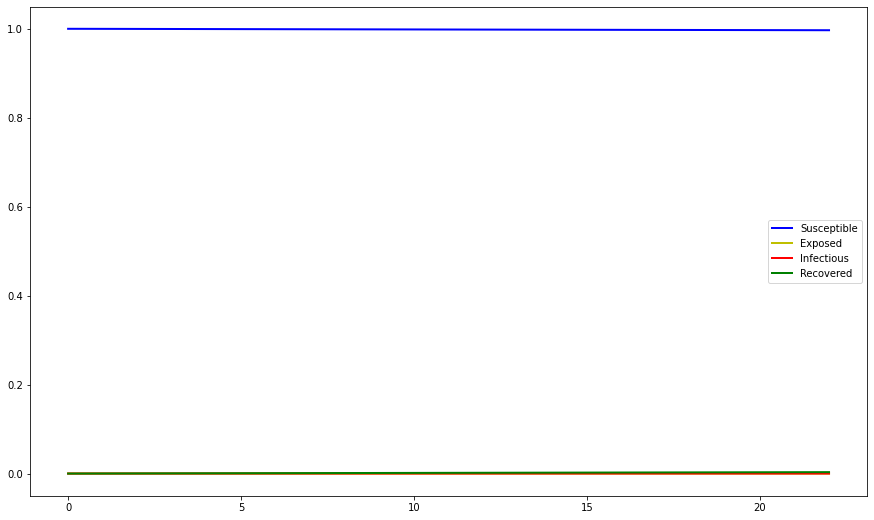

In [108]:
N = 1
alpha = 3
beta = 3
gamma = 3
t, S, E, I, R = model_seir(N, alpha, gamma, beta)

exp_growth = round(seir_lambda(alpha, gamma, beta), 3)
print(f'Экспоненциальный рост {exp_growth}')

#calling plot_seir here
plot_seir(t,S,E,I,R)

$R_0 = 1$ - критическое место, но эпидемия ещё не начинается

Экспоненциальный рост = 0, что означает, что эпидемия не начинается

$$ \beta = \gamma = 3 $$
$$ \alpha = 4 $$

Экспоненциальный рост 0.464


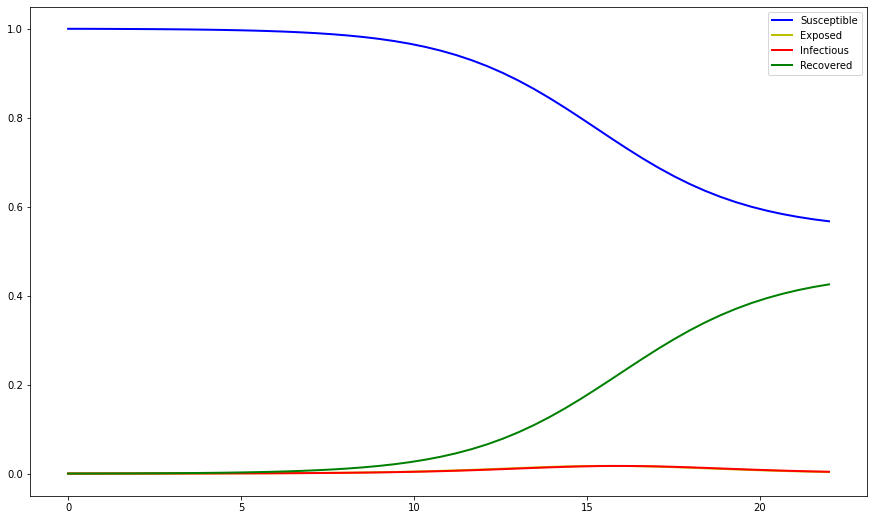

In [107]:
N = 1
alpha = 4
beta = 3
gamma = 3
t, S, E, I, R = model_seir(N, alpha, gamma, beta)

exp_growth = round(seir_lambda(alpha, gamma, beta), 3)
print(f'Экспоненциальный рост {exp_growth}')

#calling plot_seir here
plot_seir(t,S,E,I,R)

$R_0 =\dfrac{4}{3} > 1$, эпидемия начинается, но не разрастается (переболели не все)

Экспоненциальный рост > 0, но рост небольшой.

$$ \beta = \gamma = 3 $$
$$ \alpha = 6 $$

Экспоненциальный рост 1.243


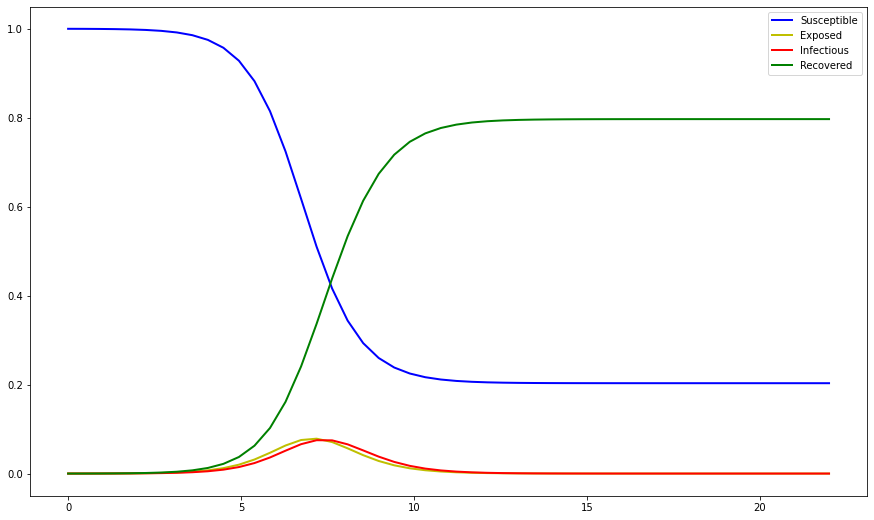

In [106]:
N = 1
alpha = 6
beta = 3
gamma = 3
t, S, E, I, R = model_seir(N, alpha, gamma, beta)

exp_growth = round(seir_lambda(alpha, gamma, beta), 3)
print(f'Экспоненциальный рост {exp_growth}')

#calling plot_seir here
plot_seir(t,S,E,I,R)

$R_0 = 2 $, мы видим, что число переболевших в популяции около 80%  

Экспоненциальный рост > 1, это означает, что в начале болезни (при маленьких $t$) эпидемия разрасталась экспоненциально

$$ \beta = \gamma = 3 $$
$$ \alpha = 10 $$

Экспоненциальный рост 2.477


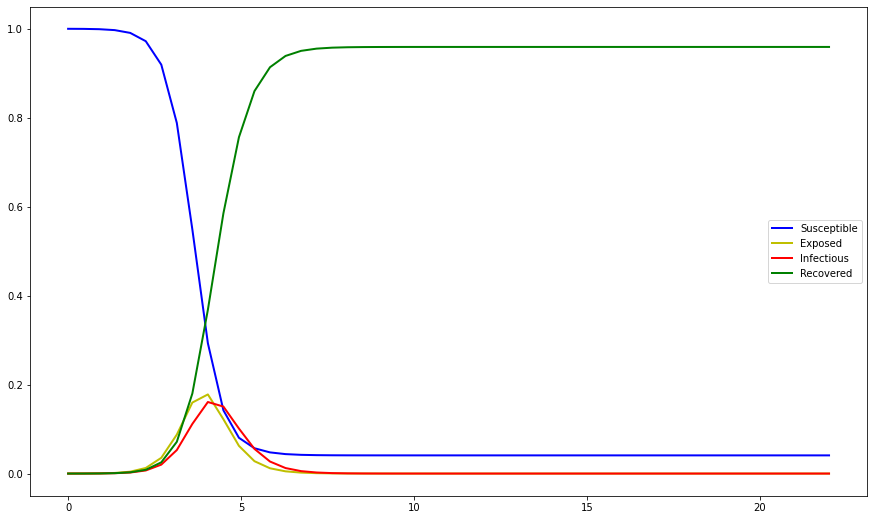

In [105]:
N = 1
alpha = 10
beta = 3
gamma = 3
t, S, E, I, R = model_seir(N, alpha, gamma, beta)
exp_growth = round(seir_lambda(alpha, gamma, beta), 3)
print(f'Экспоненциальный рост {exp_growth}')

#calling plot_seir here
plot_seir(t,S,E,I,R)

При среднем количестве заражённых людей одним заболевшим $R_0 =\dfrac{10}{3}$, практически вся наша популяция переболеет и выработает иммунитет. 

Экспоненциальный рост ~ 2.5 - это достаточно высокий показатель. Мы видим, что в начале болезни графики $E, I$ более вертикальные, чем все предыдущие. 

Такой экспоненциальный показатель, как и такое репродуктивное число хороши для абстрактной модели, потому что люди выработают иммунитет, и эпидемия больше не повторится. Однако в жизни нам приходится учитывать множество факторов: иммунитет может быть на какое-то время, в систему нужно добавить количество смертей, также необходимо учитывать возможности и мощности системы здравоохранения, поэтому мы пытаемся по возможности уменьшить $R_0$, чтобы не увидеть высокий экспоненциальный рост.